# Sampling from a random line in R^3

In [69]:
import numpy as np 

# Outputs n sample points from a random line in R^3 as a matrix of the form nx3. 
def sample_line(n):
    
    #directional vector
    dir_vec = np.random.random(3)
    
    #point on the line
    line_point = np.random.random(3) 
    
    parameter = np.transpose(np.random.randn(n)[np.newaxis]) 
    
    #vector form of the equation of the line
    line_points = line_point + parameter*dir_vec 
      
    return line_points

# Sampling from a random plane in R^3

In [70]:
import numpy as np 

# Outputs n sample points from a random plane in R^3 as a matrix of the form nx3.
def sample_plane(n):
    
    #normal vector to the the plane
    normal_vec = np.random.random(3) 
    
    #point on the plane
    point_plane = np.random.random(3) 
    plane_points = [] 
    
    #Points on the plane must satisfy the equation (n1,n2,n3).(x-p1, y-p2, z-p3) = 0, where . operation 
    #represents the dot product and (n1,n2,n3) is the normal vector and (p1,p2,p3) is a point on the plane.
    #We randomly sample for x and y and solve for z using the above equation. 
    for int in range(0,n) :
        sample_2coord = np.random.random(2) 
        last_coord = sample_2coord - point_plane[0:2] 
        last_coord = -(np.dot(normal_vec[0:2], last_coord)-normal_vec[2]*point_plane[2])/normal_vec[2] 
        sample_2coord = np.append(sample_2coord, last_coord) 
        plane_points = np.append(plane_points,sample_2coord)
   
    plane_points = np.reshape(plane_points, (n,3))    
         
    return plane_points

# Sampling from a random sphere in R^3

In [71]:
import numpy as np

# Outputs n sample points from a random sphere in R^3 centered at c as a matrix of the form nx3.
#Note: We use the last construction found in http://mathworld.wolfram.com/SpherePointPicking.html.
def sample_sphere(n, c):
    vec = np.random.randn(3, n)
    vec /= np.linalg.norm(vec, axis=0)
    
    #Shifts all points by c to move the sphere away from the origin.
    recenter = np.repeat(c,n)
    recenter = np.reshape(recenter, (3,n))
    vec = vec + recenter
   
    return vec.T

# Scatter plot 

In [72]:
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

#Inputs xs, ys, zs, representing the x,y,and z coordinates of the points respectively and plots them. 
def plot_1object(xs, ys, zs) : 
    
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d')
    
    return ax.scatter(xs,ys,zs)

In [73]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2objects(x1, y1, z1, x2, y2, z2) :
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, y1, z1, color = 'c') 
    ax.scatter(x2, y2, z2)

#  

# Examples

In [74]:
L = sample_line(100) 

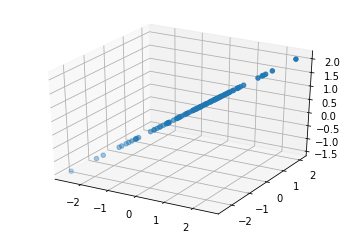

In [75]:
plot_1object(L[:,0], L[:,1], L[:,2])

In [76]:
P = sample_plane(1000) 

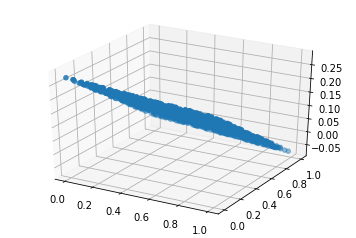

In [77]:
plot_1object(P[:,0], P[:,1],P[:,2])

In [78]:
S = sample_sphere(1000,[1,2,3])

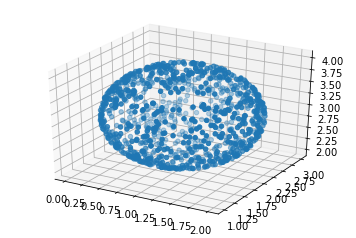

In [79]:
plot_1object(S[:,0], S[:,1],S[:,2])

# Intersecting Objects

In [80]:
import numpy as np

#Outputs n sample points from a random plane and m sample points from a line intersecting said random plane.
def plane_line(n, m) :
    sample_p = sample_plane(n)
    
    #Construct a random line through point sample_p[0]
    line_point = sample_p[0] 
    
    #directional vector of the random line
    dir_vec = np.random.randn(3)
    
    parameter = np.transpose(np.random.random(m)[np.newaxis])
    
    #vector form of the equation of the line
    sample_l = line_point + parameter*dir_vec
    
    #The first element is an array of the n sample points from the plane.
    #The second element is an array of the m sample points from the line.
    return [sample_p, sample_l]

In [81]:
import numpy as np 

#Outputs n sample points from a random sphere and m sample points from a line intersecting said random sphere.
def sphere_line(n, c, m) :
    sample_s = sample_sphere(n, c)
    
    #Construct a random line through point sample_s[0]
    line_point = sample_s[0] 
    
    parameter =np.transpose(np.random.random(m)[np.newaxis])
    
    #vector form of the equation of the line
    #The directional vector is line_point - (0,0,0) = line_point
    sample_l = line_point + parameter*line_point
    
    #The first element is an array of the n sample points from the sphere. 
    #The second element is an array of the m sample points from the line.
    return [sample_s, sample_l]

#  

# Examples

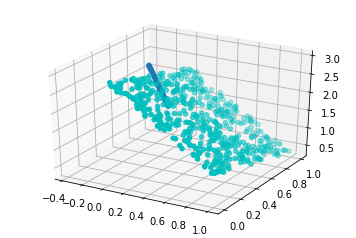

In [83]:
A =plane_line(500, 100)
p = A[0]
l = A[1]

Plot_2objects(p[:,0], p[:,1], p[:,2],l[:,0],l[:,1], l[:,2])

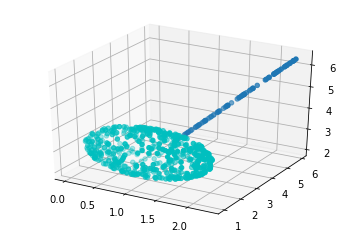

In [84]:
A = sphere_line(500,[1,2,3],100)
s = A[0]
l = A[1]

Plot_2objects(s[:,0], s[:,1], s[:,2],l[:,0],l[:,1], l[:,2])